# Libraries

In [100]:
import pandas as pd
import os
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import to_rgba


# MEMORY POST MR

# Are there statistically significant differences between conditions in immediate recall performance?

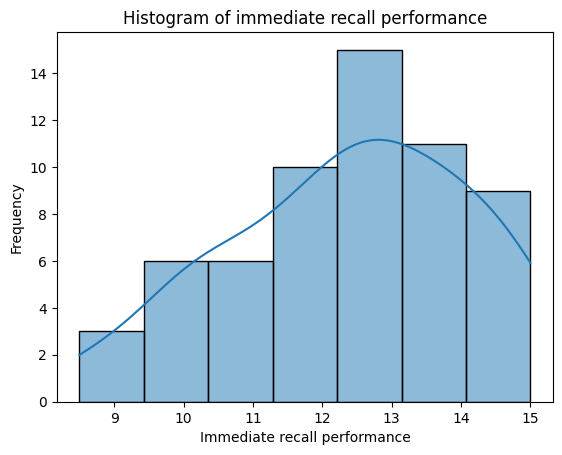

Shapiro-Wilk Test:
Test Statistic = 0.9579623937606812
p-value = 0.03743549808859825
Sample does not look Gaussian (reject H0)
Friedman Test:
Test statistic = 1.371428571428591
p-value = 0.5037302936889583
Fail to reject null hypothesis: There are no significant differences between sessions.


In [22]:
#Here, mem_av_imm1_imm2 is the average of immediate1 and immediate2 and used as an indicator for initial learning performance

df = pd.read_csv("../Data/cognition.csv")


# Remove nans from the mem_av_imm1_imm2 column
df_clean = df.dropna(subset=['mem_av_imm1_imm2'])



# STEP 1: Test normality of data
sns.histplot(df_clean['mem_av_imm1_imm2'], kde=True)
plt.title('Histogram of immediate recall performance')
plt.xlabel('Immediate recall performance')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Test for normality
stat, p = shapiro(df_clean['mem_av_imm1_imm2'])
print('Shapiro-Wilk Test:')
print('Test Statistic =', stat)
print('p-value =', p)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
    

#STEP 2: Perform non-parametric Friedmans test
mem_av_imm1_imm2_data = df_clean.pivot(index='subject', columns='condition', values='mem_av_imm1_imm2')

statistic, p_value = friedmanchisquare(*[mem_av_imm1_imm2_data[condition] for condition in mem_av_imm1_imm2_data.columns])

# Results
print('Friedman Test:')
print('Test statistic =', statistic)
print('p-value =', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis: There are significant differences between conditions.')
else:
    print('Fail to reject null hypothesis: There are no significant differences between conditions.')
    
    
    






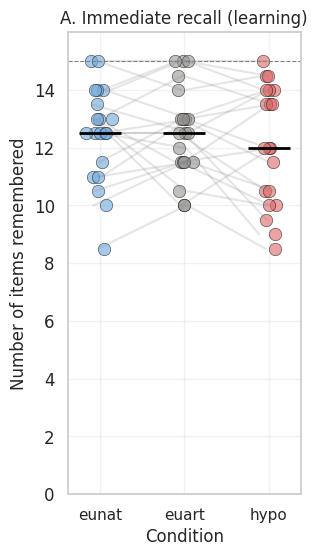

In [40]:
# Figure

df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['mem_av_imm1_imm2'])
mem_av_imm1_imm2_data = df_clean[['subject','condition','mem_av_imm1_imm2']]

#Style settings
alpha_value=0.2
order = ['eunat', 'euart', 'hypo'] 
my_pal = ['#6fa8dc', '#999794', '#e06666']  


# Plotting
plt.figure(figsize=(3, 6))
sns.set(style='whitegrid', rc={'grid.color': 'lightgray', 'grid.alpha': 0.3})

subjects = df_clean['subject'].unique()
for subject in subjects:
    subject_data = mem_av_imm1_imm2_data[mem_av_imm1_imm2_data['subject'] == subject]
    
    for condition in order: 
        condition_data = subject_data[subject_data['condition'] == condition]
        if not condition_data.empty:  # Check if data exists for the condition
            jittered_x = order.index(condition) + np.random.normal(0, 0.05) 
            plt.scatter(
                jittered_x,  
                condition_data['mem_av_imm1_imm2'].values,  
                color=my_pal[order.index(condition)],  
                alpha=0.6,  
                edgecolor='black',  
                linewidth=0.5,
                s=80  # Size of the scatter point
            )
    
    # Connect eunat and euart
    filtered_data = subject_data[subject_data['condition'].isin(['eunat', 'euart'])]
    if len(filtered_data) == 2:  # Ensure both eunat and euart are present
        jittered_x = [
            order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']
        ]
        plt.plot(
            jittered_x,  
            filtered_data['mem_av_imm1_imm2'],
            marker=None,  
            linestyle='-',  
            color='grey',  
            alpha=alpha_value
        )
    
    # Connect euart and hypo
    filtered_data = subject_data[subject_data['condition'].isin(['euart', 'hypo'])]
    if len(filtered_data) == 2:  # Ensure both euart and hypo are present
        jittered_x = [
            order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']
        ]
        line_color = 'grey'
        plt.plot(
            jittered_x,  
            filtered_data['mem_av_imm1_imm2'],
            marker=None,  
            linestyle='-',  
            color=line_color,  
            alpha=alpha_value
        )

# Add median bars for each condition 
for idx, condition in enumerate(order):
    condition_data = mem_av_imm1_imm2_data[mem_av_imm1_imm2_data['condition'] == condition]
    median_val = condition_data['mem_av_imm1_imm2'].median()
    
    exact_x_position = idx  # Bar centered above x-tick

    plt.hlines(
        y=median_val,  
        xmin=exact_x_position - 0.25,  
        xmax=exact_x_position + 0.25,  
        color=my_pal[idx],  
        linewidth=2,  
        zorder=10,
        edgecolor='black'
    )

# Add horizontal reference line at max. performance score
plt.axhline(y=15, color='gray', linestyle='--', linewidth=0.8)

# Labeling
plt.xlabel('Condition')
plt.ylabel('Number of items remembered', fontsize=12)
plt.title('A. Immediate recall (learning)', fontsize=12)
plt.ylim(0, 15.999)
plt.xticks(ticks=range(len(order)), labels=order)  
plt.tick_params(axis='y', labelsize=12)

plt.show()

# Are there statistically significant differences between conditions in delayed recall performance after 20 minutes?

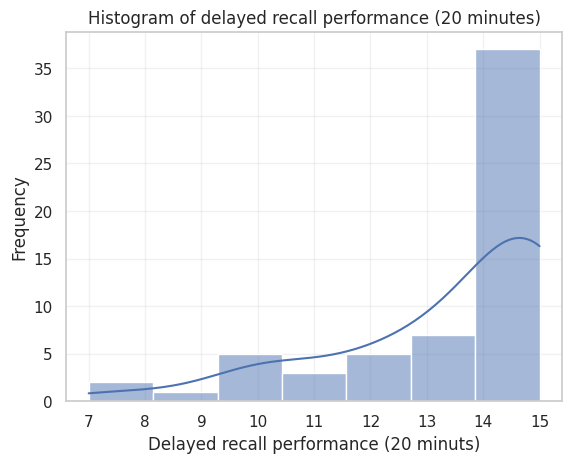

Shapiro-Wilk Test:
Test Statistic = 0.8004202246665955
p-value = 1.3831333944835933e-07
Sample does not look Gaussian (reject H0)
Friedman Test:
Test statistic = 2.627450980392175
p-value = 0.2688167145404913
Fail to reject null hypothesis: There are no significant differences between sessions.


In [37]:
# Remove nans from the mem_del20min column
df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['mem_del20min'])


# STEP 1: Test normality of data
sns.histplot(df_clean['mem_del20min'], kde=True)
plt.title('Histogram of delayed recall performance (20 minutes)')
plt.xlabel('Delayed recall performance (20 minuts)')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Test for normality
stat, p = shapiro(df_clean['mem_del20min'])
print('Shapiro-Wilk Test:')
print('Test Statistic =', stat)
print('p-value =', p)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
    

#STEP 2: Perform non-parametric Friedmans test
mem_del20min_data = df_clean.pivot(index='subject', columns='condition', values='mem_del20min')

statistic, p_value = friedmanchisquare(*[mem_del20min_data[condition] for condition in mem_del20min_data.columns])

# Results
print('Friedman Test:')
print('Test statistic =', statistic)
print('p-value =', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis: There are significant differences between conditions.')
else:
    print('Fail to reject null hypothesis: There are no significant differences between conditions.')
    
    
    






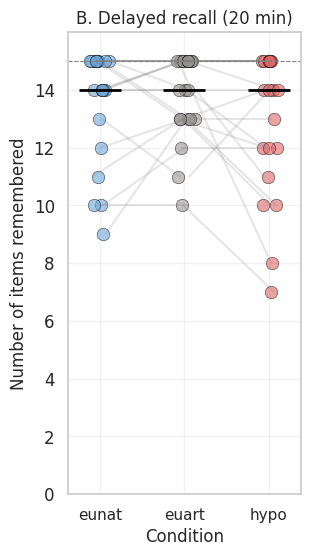

In [39]:

# Figure
df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['mem_del20min'])
mem_del20min_data = df_clean[['subject','condition','mem_del20min']]

#Style settings
alpha_value=0.2
order = ['eunat', 'euart', 'hypo'] 
my_pal = ['#6fa8dc', '#999794', '#e06666']  


# Plotting
plt.figure(figsize=(3, 6))
sns.set(style='whitegrid', rc={'grid.color': 'lightgray', 'grid.alpha': 0.3})

subjects = df_clean['subject'].unique()
for subject in subjects:
    subject_data = mem_del20min_data[mem_del20min_data['subject'] == subject]
    
    for condition in order: 
        condition_data = subject_data[subject_data['condition'] == condition]
        if not condition_data.empty:  # Check if data exists for the session
            jittered_x = order.index(condition) + np.random.normal(0, 0.05) 
            plt.scatter(
                jittered_x,  
                condition_data['mem_del20min'].values,  
                color=my_pal[order.index(condition)],  
                alpha=0.6,  
                edgecolor='black',  
                linewidth=0.5,
                s=80  # Size of the scatter point
            )
    
    # Connect eunat and euart
    filtered_data = subject_data[subject_data['condition'].isin(['eunat', 'euart'])]
    if len(filtered_data) == 2:  # Ensure both eunat and euart are present
        jittered_x = [
            order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']
        ]
        plt.plot(
            jittered_x,  
            filtered_data['mem_del20min'],
            marker=None,  
            linestyle='-',  
            color='grey',  
            alpha=alpha_value
        )
    
    # Connect euart and hypo
    filtered_data = subject_data[subject_data['condition'].isin(['euart', 'hypo'])]
    if len(filtered_data) == 2:  # Ensure both euart and hypo are present
        jittered_x = [
            order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']
        ]
        line_color = 'grey'
        plt.plot(
            jittered_x,  
            filtered_data['mem_del20min'],
            marker=None,  
            linestyle='-',  
            color=line_color,  
            alpha=alpha_value
        )

# Add median bars for each condition 
for idx, condition in enumerate(order):
    condition_data = mem_del20min_data[mem_del20min_data['condition'] == condition]
    median_val = condition_data['mem_del20min'].median()
    
    exact_x_position = idx  # Bar centered above x-tick

    plt.hlines(
        y=median_val,  
        xmin=exact_x_position - 0.25,  
        xmax=exact_x_position + 0.25,  
        color=my_pal[idx],  
        linewidth=2,  
        zorder=10,
        edgecolor='black'
    )

# Add horizontal reference line at max. performance score
plt.axhline(y=15, color='gray', linestyle='--', linewidth=0.8)

# Labeling
plt.xlabel('Condition')
plt.ylabel('Number of items remembered', fontsize=12)
plt.title('B. Delayed recall (20 min)', fontsize=12)
plt.ylim(0, 15.999)
plt.xticks(ticks=range(len(order)), labels=order)  
plt.tick_params(axis='y', labelsize=12)

plt.show()

# Are there statistically significant differences between conditions in delayed recall performance after 24 hours?

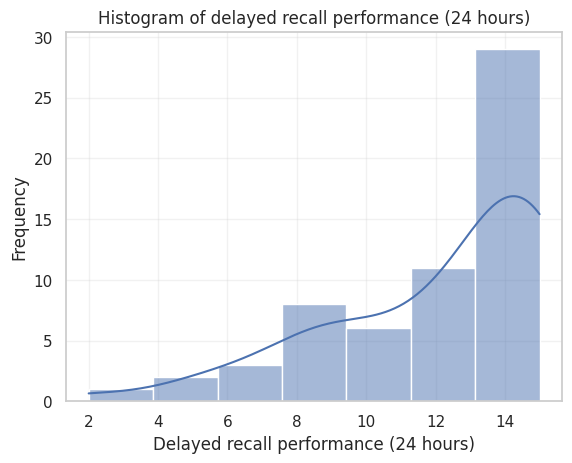

Shapiro-Wilk Test:
Test Statistic = 0.8447805643081665
p-value = 2.144273594240076e-06
Sample does not look Gaussian (reject H0)
Friedman Test:
Test statistic = 9.457627118644098
p-value = 0.008836949338721955
Reject null hypothesis: There are significant differences between conditions.
Post-hoc test: hypo vs. euart
Wilcoxon Signed-Rank Test:
Test statistic = 14.0
p-value = 0.008628617405491945
Reject null hypothesis: There is a significant difference between hypo and euart

Post-hoc test: euart vs. eunat
Wilcoxon Signed-Rank Test:
Test statistic = 39.5
p-value = 0.3995396745749721
Fail to reject null hypothesis: There is no significant difference between euart and eunat.

                 Generalized Linear Model Regression Results                  
Dep. Variable:             mem_del24h   No. Observations:                   60
Model:                            GLM   Df Residuals:                       56
Model Family:                Gaussian   Df Model:                            3
Li

/opt/conda/envs/neuroenergeticslab_py3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
<ipython-input-60-86e30164a205>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glm_data[['mem_av_imm1_imm2']] = scaler.fit_transform(glm_data[['mem_av_imm1_imm2']])
/opt/conda/envs/neuroenergeticslab_py3.8/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [60]:
# Remove nans from the mem_del24h column

df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['mem_del24h'])


# STEP 1: Test normality of data
sns.histplot(df_clean['mem_del24h'], kde=True)
plt.title('Histogram of delayed recall performance (24 hours)')
plt.xlabel('Delayed recall performance (24 hours)')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Test for normality
stat, p = shapiro(df_clean['mem_del24h'])
print('Shapiro-Wilk Test:')
print('Test Statistic =', stat)
print('p-value =', p)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
    

# STEP 2: Perform non-parametric Friedmans test
mem_del24h_data = df_clean.pivot(index='subject', columns='condition', values='mem_del24h')

statistic, p_value = friedmanchisquare(*[mem_del24h_data[condition] for condition in mem_del24h_data.columns])

# Results
print('Friedman Test:')
print('Test statistic =', statistic)
print('p-value =', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis: There are significant differences between conditions.')
else:
    print('Fail to reject null hypothesis: There are no significant differences between conditions.')
    
    
    

# STEP 3: post hoc testing: Wilcoxon
mem_del24h_data = df_clean[['subject','condition','mem_del24h']]
metric_column = 'mem_del24h'
alpha = 0.05

# hypo vs. euart
cond1 = 'hypo'
cond2 = 'euart'
data1 = mem_del24h_data[mem_del24h_data['condition'] == cond1][metric_column]
data2 = mem_del24h_data[mem_del24h_data['condition'] == cond2][metric_column]
statistic, p_value = wilcoxon(data1, data2)

print(f'Post-hoc test: {cond1} vs. {cond2}')
print('Wilcoxon Signed-Rank Test:')
print(f'Test statistic = {statistic}')
print(f'p-value = {p_value}')
if p_value < alpha:
    print(f'Reject null hypothesis: There is a significant difference between {cond1} and {cond2}')
else:
    print(f'Fail to reject null hypothesis: There is no significant difference between {cond1} and {cond2}.')
print()

# euart vs. eunat
cond1 = 'euart'
cond2 = 'eunat'
data1 = mem_del24h_data[mem_del24h_data['condition'] == cond1][metric_column]
data2 = mem_del24h_data[mem_del24h_data['condition'] == cond2][metric_column]
statistic, p_value = wilcoxon(data1, data2)

print(f'Post-hoc test: {cond1} vs. {cond2}')
print('Wilcoxon Signed-Rank Test:')
print(f'Test statistic = {statistic}')
print(f'p-value = {p_value}')
if p_value < alpha:
    print(f'Reject null hypothesis: There is a significant difference between {cond1} and {cond2}')
else:
    print(f'Fail to reject null hypothesis: There is no significant difference between {cond1} and {cond2}.')
print()





# STEP 4: perform a GLM and include learning (mem_av_imm1_imm2) as a predictor


glm_data = df_clean[['subject','condition','mem_del24h', 'mem_av_imm1_imm2']]

hypo_df = glm_data[glm_data['condition']=='hypo']
euart_df = glm_data[glm_data['condition']=='euart']
scaler = StandardScaler()
glm_data[['mem_av_imm1_imm2']] = scaler.fit_transform(glm_data[['mem_av_imm1_imm2']])

y = glm_data['mem_del24h']
X_encoded = pd.get_dummies(glm_data['condition'])
X_encoded = X_encoded.drop(columns=['euart'])
X = pd.concat([X_encoded, glm_data['mem_av_imm1_imm2']], axis=1)
X = sm.add_constant(X)


model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

print(model.summary())





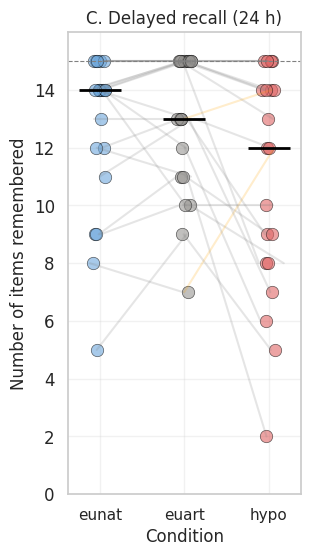

In [66]:

# Figure
df = pd.read_csv("../Data/cognition.csv")

df_clean = df.dropna(subset=['mem_del24h'])
mem_del24h_data = df_clean[['subject','condition','mem_del24h']]

#Style settings
alpha_value=0.2
order = ['eunat', 'euart', 'hypo'] 
my_pal = ['#6fa8dc', '#999794', '#e06666']  


# Plotting
plt.figure(figsize=(3, 6))
sns.set(style='whitegrid', rc={'grid.color': 'lightgray', 'grid.alpha': 0.3})

subjects = df_clean['subject'].unique()
for subject in subjects:
    subject_data = mem_del24h_data[mem_del24h_data['subject'] == subject]
    
    for condition in order: 
        condition_data = subject_data[subject_data['condition'] == condition]
        if not condition_data.empty:  # Check if data exists for the session
            jittered_x = order.index(condition) + np.random.normal(0, 0.05) 
            plt.scatter(
                jittered_x,  
                condition_data['mem_del24h'].values,  
                color=my_pal[order.index(condition)],  
                alpha=0.6,  
                edgecolor='black',  
                linewidth=0.5,
                s=80  # Size of the scatter point
            )
    
    # Connect eunat and euart
    filtered_data = subject_data[subject_data['condition'].isin(['eunat', 'euart'])]
    if len(filtered_data) == 2:  # Ensure both eunat and euart are present
        jittered_x = [
            order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']
        ]
        plt.plot(
            jittered_x,  
            filtered_data['mem_del24h'],
            marker=None,  
            linestyle='-',  
            color='grey',  
            alpha=alpha_value
        )
    
    # Connect euart and hypo
    filtered_data = subject_data[subject_data['condition'].isin(['euart', 'hypo'])]
    if len(filtered_data) == 2:  # Ensure both euart and hypo are present
        jittered_x = [
            order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']
        ]
        line_color = 'orange' if filtered_data['mem_del24h'].values[0] > filtered_data['mem_del24h'].values[1] else 'grey'
        plt.plot(
            jittered_x,  
            filtered_data['mem_del24h'],
            marker=None,  
            linestyle='-',  
            color=line_color,  
            alpha=alpha_value
        )

# Add median bars for each condition 
for idx, condition in enumerate(order):
    condition_data = mem_del24h_data[mem_del24h_data['condition'] == condition]
    median_val = condition_data['mem_del24h'].median()
    
    exact_x_position = idx  # Bar centered above x-tick

    plt.hlines(
        y=median_val,  
        xmin=exact_x_position - 0.25,  
        xmax=exact_x_position + 0.25,  
        color=my_pal[idx],  
        linewidth=2,  
        zorder=10,
        edgecolor='black'
    )

# Add horizontal reference line at max. performance score
plt.axhline(y=15, color='gray', linestyle='--', linewidth=0.8)

# Labeling
plt.xlabel('Condition')
plt.ylabel('Number of items remembered', fontsize=12)
plt.title('C. Delayed recall (24 h)', fontsize=12)
plt.ylim(0, 15.999)
plt.xticks(ticks=range(len(order)), labels=order)  
plt.tick_params(axis='y', labelsize=12)

plt.show()

# ATTENTION POST MR

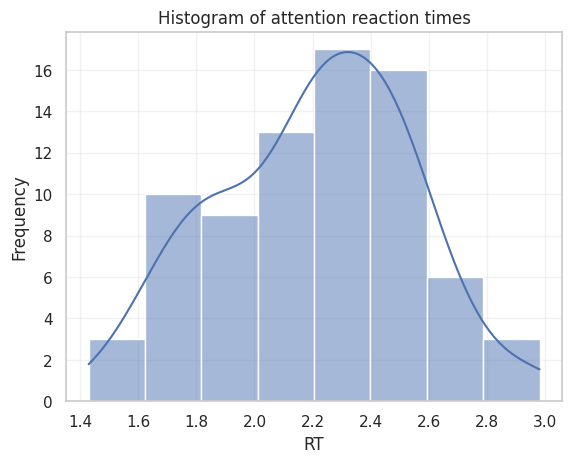

Shapiro-Wilk Test:
Test Statistic = 0.9835318326950073
p-value = 0.4209485352039337
Sample looks Gaussian (fail to reject H0)
                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  2.2651 2.0000 48.0000 0.1148



In [78]:
#Here, we test whether average reaction time (att_av_rt) during a visual attention task differs significantly between conditions. 

df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['att_av_rt'])


# STEP 1: Assess whether att_av_rt data are normally distributed
sns.histplot(df_clean['att_av_rt'], kde=True)
plt.title('Histogram of attention reaction times')
plt.xlabel('RT')
plt.ylabel('Frequency')
plt.show()

stat, p = shapiro(df_clean['att_av_rt'])
print('Shapiro-Wilk Test:')
print('Test Statistic =', stat)
print('p-value =', p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


    
    
    
# STEP 2: run Repeated Measures ANOVA to test for between-condition differences in reaction time    


subjects_with_all_sessions = df_clean['subject'].value_counts()[df_clean['subject'].value_counts() == 3].index.tolist()
df_clean = df_clean[df_clean['subject'].isin(subjects_with_all_sessions)]


pd.set_option('display.max_rows', None)
anovarm_results = AnovaRM(df_clean, 'att_av_rt', 'subject', within=['condition']).fit()

# Print the ANOVA table
print(anovarm_results.summary())






<ipython-input-83-f6200e9b0f6d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['condition'] = df_clean['condition'].replace({


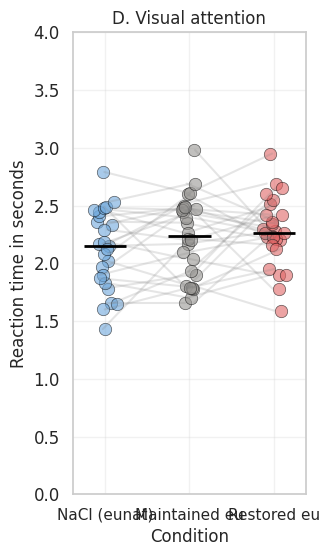

In [83]:
# Figure

df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['att_av_rt'])

# Replace previous condition names with new condition names
df_clean['condition'] = df_clean['condition'].replace({
    'hypo': 'Restored eu',  
    'euart': 'Maintained eu',
    'eunat': 'NaCl (eunat)'
})

# Style settings
my_pal = ['#6fa8dc', '#999794', '#e06666']  
order = ['NaCl (eunat)', 'Maintained eu','Restored eu' ]

# Plotting
plt.figure(figsize=(3, 6))
sns.set(style='whitegrid', rc={'grid.color': 'lightgray', 'grid.alpha': 0.3})

alpha_value = 0.2
subjects = df_clean['subject'].unique()

# Overlay data points and connect by subject
for subject in subjects:
    subject_data = df_clean[df_clean['subject'] == subject]
    
    # Connect Restored eu and Maintained eu
    filtered_data = subject_data[subject_data['condition'].isin(['Restored eu', 'Maintained eu'])]
    if len(filtered_data) == 2:
        jittered_x = [order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']]
        plt.plot(
            jittered_x,
            filtered_data['att_av_rt'],
            linestyle='-',
            color='grey',
            alpha=alpha_value
        )
    
    # Connect Maintained eu and NaCl (eunat)
    filtered_data = subject_data[subject_data['condition'].isin(['Maintained eu', 'NaCl (eunat)'])]
    if len(filtered_data) == 2:
        jittered_x = [order.index(cond) + np.random.normal(0, 0.05) for cond in filtered_data['condition']]
        plt.plot(
            jittered_x,
            filtered_data['att_av_rt'],
            linestyle='-',
            color='grey',
            alpha=alpha_value
        )

        
for idx, condition in enumerate(order):
    condition_data = df_clean[df_clean['condition'] == condition]
    for _, row in condition_data.iterrows():
        jittered_x = idx + np.random.normal(0, 0.05)
        plt.scatter(
            jittered_x,
            row['att_av_rt'],
            color=my_pal[idx],
            alpha=0.6,
            edgecolor='black',
            linewidth=0.5,
            s=80  # Size of the point
        )

# Add median bars for each condition
for idx, condition in enumerate(order):
    condition_data = df_clean[df_clean['condition'] == condition]
    median_val = condition_data['att_av_rt'].median()
    plt.hlines(
        y=median_val,
        xmin=idx - 0.25,
        xmax=idx + 0.25,
        color=my_pal[idx],
        linewidth=2,
        zorder=10,
        edgecolor='black'
    )


# Labels 
plt.xlabel('Condition')
plt.ylabel('Reaction time in seconds', fontsize=12)
plt.title('D. Visual attention', fontsize=12)
plt.ylim(0, 4)
plt.xticks(ticks=range(len(order)), labels=order)  
plt.tick_params(axis='y', labelsize=12)


plt.show()


# BLOOD GLUCOSE DURING COGNITIVE TESTING

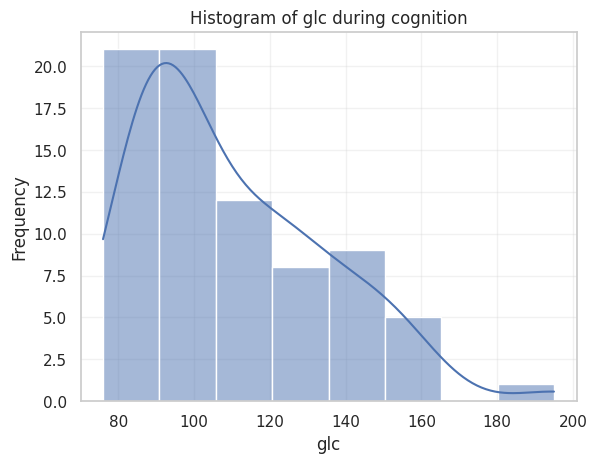

Shapiro-Wilk Test:
Test Statistic = 0.9122730493545532
p-value = 5.742674693465233e-05
Sample does not look Gaussian (reject H0)
Friedman Test:
Test statistic = 32.7572815533981
p-value = 7.706313802795431e-08
Reject null hypothesis: There are significant differences between sessions.
Wilcoxon Signed-Rank Test for hypo vs euart:
Test statistic = 92.5
p-value = 0.0626264214515686
Fail to reject null hypothesis: There is no significant difference between hypo and euart.

Wilcoxon Signed-Rank Test for euart vs eunat:
Test statistic = 6.5
p-value = 1.1324882507324219e-06
Reject null hypothesis: There is a significant difference between euart and eunat


In [91]:
## Here, we want to test, whether blood glc levels during cognitive testing are significantly different between conditions

df = pd.read_csv("../Data/cognition.csv")
df_clean = df.dropna(subset=['av_glc_postMR'])



# STEP 1: Test normality of data
sns.histplot(df_clean['av_glc_postMR'], kde=True)
plt.title('Histogram of glc during cognition')
plt.xlabel('glc')
plt.ylabel('Frequency')
plt.show()

stat, p = shapiro(df_clean['av_glc_postMR'])
print('Shapiro-Wilk Test:')
print('Test Statistic =', stat)
print('p-value =', p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
    
# STEP 2: Apply non-parametric friedmans test

bloodglc_data = df_clean.pivot(index='subject', columns='condition', values='av_glc_postMR')
statistic, p_value = friedmanchisquare(*[bloodglc_data[condition] for condition in bloodglc_data.columns])

print('Friedman Test:')
print('Test statistic =', statistic)
print('p-value =', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis: There are significant differences between sessions.')
else:
    print('Fail to reject null hypothesis: There are no significant differences between sessions.')


    
    
# STEP 3: Post-hoc testing using Wilcoxon


# Define the conditions for contrasts
cond1 = 'hypo'
cond2 = 'euart'
cond3 = 'eunat'



# Glucose contrast
subjects_both_conditions_1 = set(df_clean[df_clean['condition'] == cond1]['subject']).intersection(set(df_clean[df_clean['condition'] == cond2]['subject']))
df_clean_1 = df_clean[df_clean['subject'].isin(subjects_both_conditions_1)]

data1_1 = df_clean_1[df_clean_1['condition'] == cond1]['av_glc_postMR']
data2_1 = df_clean_1[df_clean_1['condition'] == cond2]['av_glc_postMR']

statistic_1, p_value_1 = wilcoxon(data1_1, data2_1)

# Results glucose contrast
print(f'Wilcoxon Signed-Rank Test for {cond1} vs {cond2}:')
print('Test statistic =', statistic_1)
print('p-value =', p_value_1)

alpha = 0.05
if p_value_1 < alpha:
    print(f'Reject null hypothesis: There is a significant difference between {cond1} and {cond2}')
else:
    print(f'Fail to reject null hypothesis: There is no significant difference between {cond1} and {cond2}.')
    

    
    
# Insulin contrast
subjects_both_conditions_2 = set(df_clean[df_clean['condition'] == cond2]['subject']).intersection(set(df_clean[df_clean['condition'] == cond3]['subject']))
df_clean_2 = df_clean[df_clean['subject'].isin(subjects_both_conditions_2)]

data1_2 = df_clean_2[df_clean_2['condition'] == cond2]['av_glc_postMR']
data2_2 = df_clean_2[df_clean_2['condition'] == cond3]['av_glc_postMR']

statistic_2, p_value_2 = wilcoxon(data1_2, data2_2)


# Results insulin contrast
print(f'\nWilcoxon Signed-Rank Test for {cond2} vs {cond3}:')
print('Test statistic =', statistic_2)
print('p-value =', p_value_2)

if p_value_2 < alpha:
    print(f'Reject null hypothesis: There is a significant difference between {cond2} and {cond3}')
else:
    print(f'Fail to reject null hypothesis: There is no significant difference between {cond2} and {cond3}.')


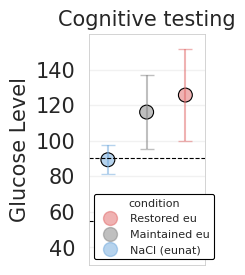

In [99]:
# Figure

df = pd.read_csv("../Data/cognition.csv")

bloodglc_data = df[['subject', 'condition','av_glc_postMR']]

# Calculate mean and standard deviation for each condition
error_data = bloodglc_data.groupby('condition')['av_glc_postMR'].agg(
    mean='mean',
    std='std'
).reset_index()




# Style settings
condition_colors = {
    'hypo': to_rgba('#e06666', alpha=0.5), 
    'euart': to_rgba('#808080', alpha=0.5), 
    'eunat': to_rgba('#6fa8dc', alpha=0.5)   
}

sns.set(style='whitegrid', rc={'grid.color': 'lightgray', 'grid.alpha': 0.3})

condition_order = ['eunat', 'euart', 'hypo']
x_positions = [0.2, 1.0, 1.8]  
position_map = dict(zip(condition_order, x_positions))




# Prepare input df
error_data['condition'] = pd.Categorical(error_data['condition'], categories=condition_order, ordered=True)
error_data = error_data.sort_values('condition')
error_data['x_pos'] = error_data['condition'].map(position_map)



# Plotting
plt.figure(figsize=(1.5, 3))  

sns.scatterplot(
    x='x_pos', y='mean', data=error_data,
    hue='condition', palette=condition_colors, s=100,
    edgecolor='black', marker='o', legend=False
)

# Add sd error bars 
for i, row in error_data.iterrows():
    plt.errorbar(
        x=row['x_pos'],  # Use assigned x positions for error bars
        y=row['mean'], 
        yerr=row['std'], 
        fmt='none', 
        ecolor=condition_colors[row['condition']], 
        capsize=5
    )

# Labels and ticks
plt.ylim(30, 160)
plt.ylabel('Glucose Level', fontsize=15)
plt.xlabel('')
plt.title('Cognitive testing', fontsize=15)

plt.yticks([40, 60, 80, 100, 120, 140])
plt.xticks([])
plt.xlim(-0.2, 2.2)
plt.tick_params(axis='both', which='major', labelsize=15)

# Reference lines
plt.axhline(y=55, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=90, color='black', linestyle='--', linewidth=0.8)

# Style settings
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.6)
    
# Legend settings
custom_labels = ['Restored eu', 'Maintained eu', 'NaCl (eunat)']
custom_colors = [condition_colors['hypo'], condition_colors['euart'], condition_colors['eunat']]
custom_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='') for color in custom_colors]
legend = (plt.legend(custom_handles, custom_labels, title="condition", loc='lower left', fontsize=8, title_fontsize=8, frameon=True))
legend.get_frame().set_facecolor('white')  # Set the background color to solid white
legend.get_frame().set_edgecolor('black')  # Set the border color to black
legend.get_frame().set_alpha(1)            # Remove any transparency by setting alpha to 1
legend.get_frame().set_linewidth(0.8) 




plt.show()
